<a href="https://colab.research.google.com/github/samuel7123/quantiun2/blob/main/QuantEDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load different libraries and the datasets


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
transactional_data = pd.read_excel("/content/QVI_transaction_data.xlsx")

In [125]:
Customer_data = pd.read_csv("/content/QVI_purchase_behaviour.csv")

In [77]:
transactional_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [78]:
transactional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We can see that the date is in integer format so lets change the date format

In [79]:
transactional_data['DATE'] = pd.to_datetime(transactional_data['DATE'], origin='1899-12-30', unit='D').reset_index(drop=True)

In [92]:
transactional_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
246737,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
246738,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
246739,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
246740,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


We should check that we are looking at the right products by examining PROD_NAME.

In [80]:
transactional_data["PROD_NAME"]

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

Looks like we are definitely looking at potato chips but how can we check that these are all chips? We can
do some basic text analysis by summarising the individual words in the product name.


In [81]:
#### Examine the words in PROD_NAME to see if there are any incorrect entries
#### such as products that are not chips
#hTe str.split() function splits each product name into individual words. The explode() method then flattens these into a single column.
prod_words = transactional_data["PROD_NAME"].str.split(" ").explode()
#prod_words = pd.DataFrame(prod_words, columns=['Word'])
prod_words.info()
prod_words.columns = ['words']
pattern = r'^[a-zA-Z]+$'
filtered_words = prod_words[prod_words.str.contains(pattern, regex=True)]
word_counts = filtered_words.value_counts()

<class 'pandas.core.series.Series'>
Index: 1863922 entries, 0 to 264835
Series name: PROD_NAME
Non-Null Count    Dtype 
--------------    ----- 
1863922 non-null  object
dtypes: object(1)
memory usage: 28.4+ MB


In [82]:
word_counts_df = word_counts.reset_index()
word_counts_df.columns = ['Word', 'Frequency']

In [83]:
word_counts_df

,Word,Frequency
0,Chips,49770
1,Kettle,41288
2,Smiths,28860
3,Salt,27976
4,Cheese,27890
...,...,...
163,Whlegrn,1432
164,Pc,1431
165,NCC,1419
166,Garden,1419


There are salsa products in the dataset but we are only interested in the chips category, so let’s remove
these.



In [84]:
transactional_data = transactional_data[~transactional_data['PROD_NAME'].str.contains('Salsa')].reset_index(drop=True)

In [93]:
transactional_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [94]:
#### Summarise the data to check for nulls and possible outliers
transactional_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


There are no nulls in the columns but product quantity appears to have an outlier which we should investigate
further. Let’s investigate further the case where 200 packets of chips are bought in one transaction.


<Axes: xlabel='PROD_QTY'>

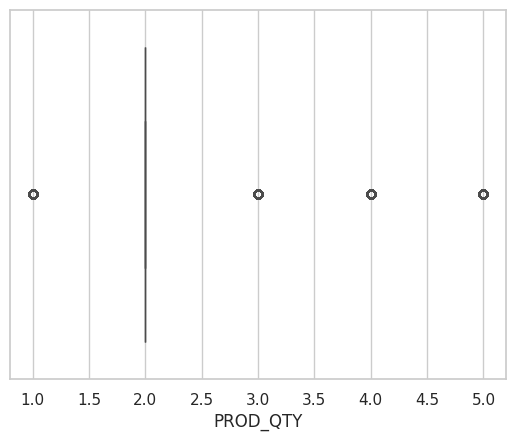

In [126]:
#finding outliers and deleting the outliers
sns.boxplot(x=transactional_data['PROD_QTY'])

In [95]:
transactional_data[transactional_data['PROD_QTY'] > 10]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [96]:
transactional_data = transactional_data[transactional_data['PROD_QTY'] <= 10].reset_index(drop=True)

In [97]:
transactional_data['Z-Score'] = (transactional_data['PROD_QTY'] - transactional_data['PROD_QTY'].mean()) / transactional_data['PROD_QTY'].std()

In [98]:
transactional_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Z-Score
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,2.467400e+05
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,-6.634881e-17
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,-2.646593e+00
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,2.731211e-01
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,2.731211e-01
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,2.731211e-01
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,9.032262e+00
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,1.000000e+00


In [99]:
#Count the number of transactions by date
transaction_count = transactional_data.groupby('DATE').size()


In [100]:
transaction_count

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64

There’s only 364 rows, meaning only 364 dates which indicates a missing date. Let’s create a sequence of
dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to
find the missing date.

In [101]:
#### Create a sequence of dates and join this to the count of transactions by date
allDates = pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')})

In [102]:

allDates

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [104]:
transactions_by_day = transactional_data.groupby('DATE').size().reset_index(name='N')
transactions_by_day = pd.merge(allDates, transactions_by_day, on='DATE', how='left')

In [108]:
transactions_by_day['N'] = transactions_by_day['N'].fillna(0)
transactions_by_day['N']

0      663.0
1      650.0
2      674.0
3      669.0
4      660.0
       ...  
360    657.0
361    669.0
362    673.0
363    703.0
364    704.0
Name: N, Length: 365, dtype: float64

In [105]:
transactions_by_day

,DATE,N
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


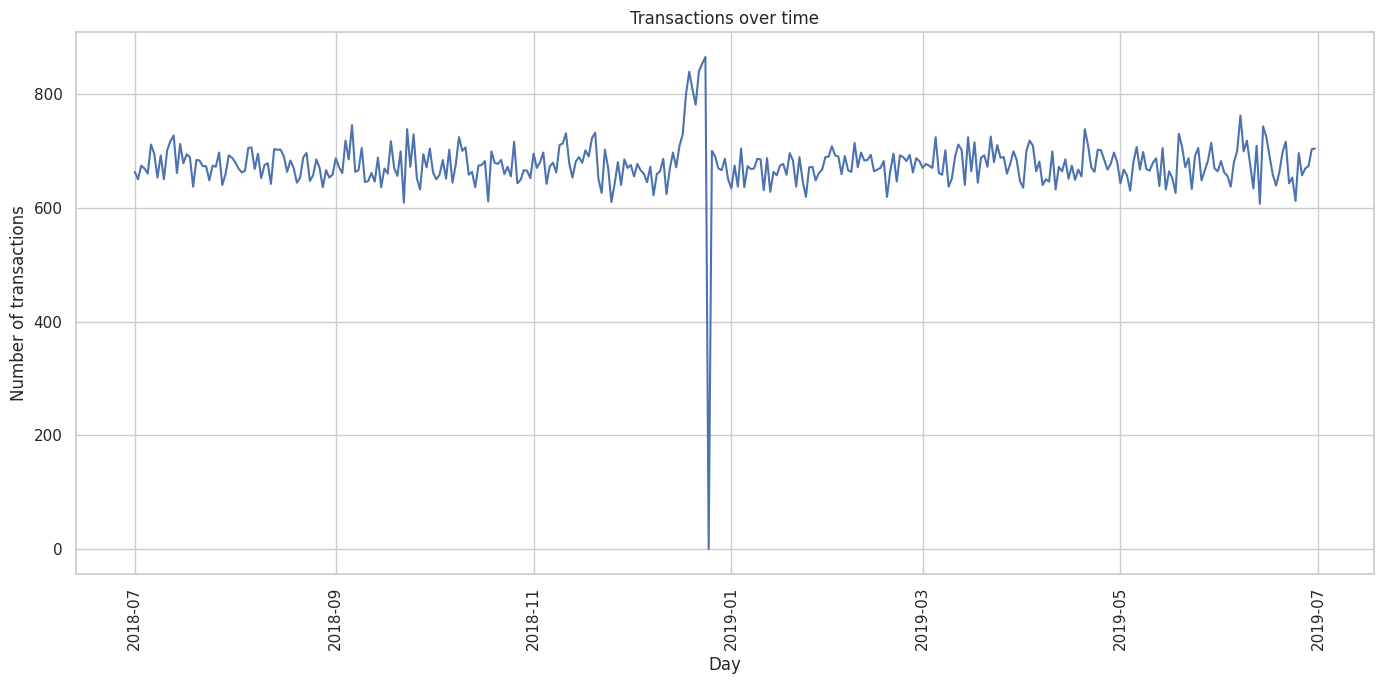

In [109]:
# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plot transactions over time
sns.lineplot(x='DATE', y='N', data=transactions_by_day)

# Customize plot
plt.title('Transactions over time')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

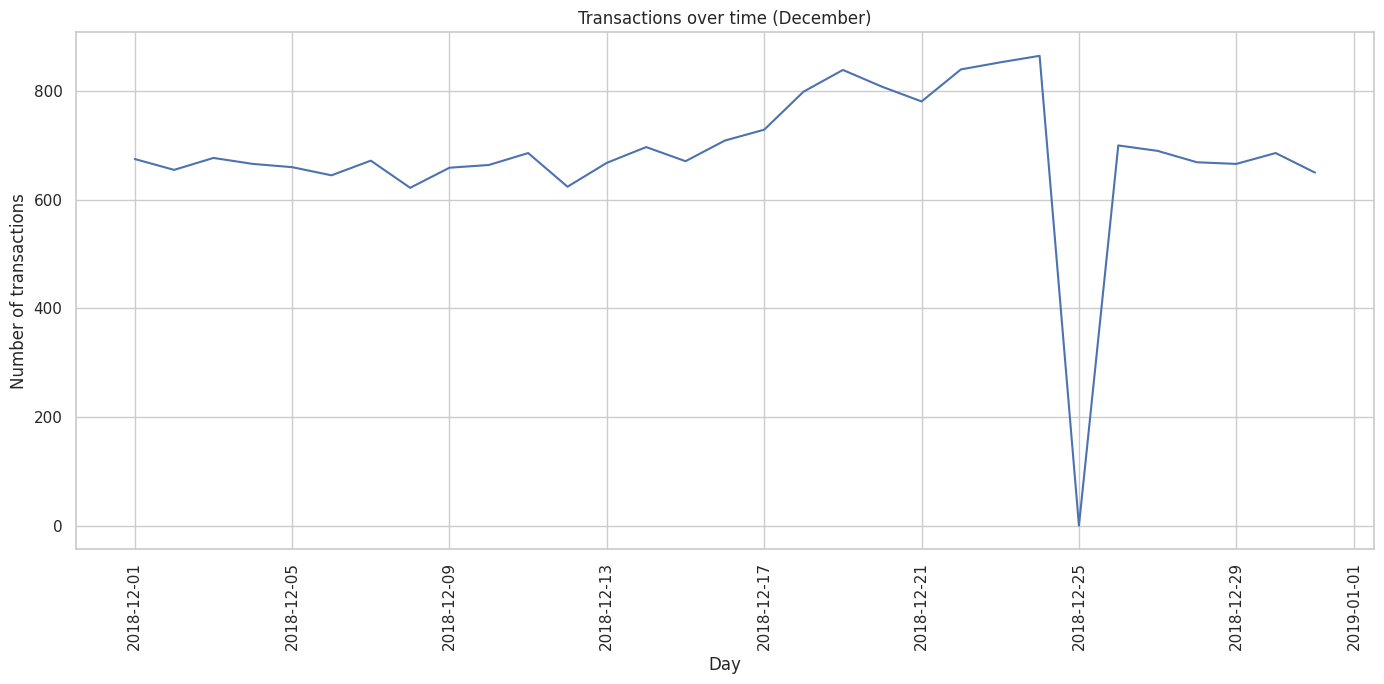

In [110]:
transactions_in_december = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plot transactions over time for December
sns.lineplot(x='DATE', y='N', data=transactions_in_december)

# Customize plot
plt.title('Transactions over time (December)')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.
Now that we are satisfied that the data no longer has outliers, we can move on to creating other features
such as brand of chips or pack size from PROD_NAME. We will start with pack size.

In [111]:
transactional_data['PACK_SIZE'] = transactional_data['PROD_NAME'].str.extract('(\d+)')
transactional_data['PACK_SIZE'] = pd.to_numeric(transactional_data['PACK_SIZE'])

In [115]:
transactional_data.groupby('PACK_SIZE').size()

PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    40203
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
330    12540
380     6416
dtype: int64

<Axes: >

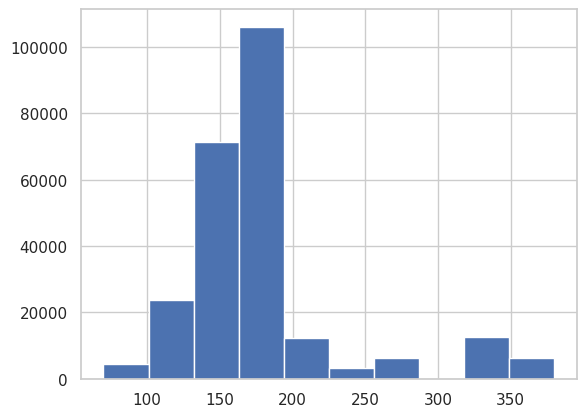

In [116]:
#### Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.

transactional_data['PACK_SIZE'].hist()

Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to
work out the brand name


The largest size is 380g and the smallest size is 70g - seems sensible!

In [117]:
transactional_data['BRAND'] = transactional_data['PROD_NAME'].str.split(' ').str[0].str.upper()

In [119]:
transactional_data.drop("Z-Score", axis=1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE
...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,TOSTITOS
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,DORITOS
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,DORITOS


Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips. Let’s combine these together.


In [122]:
#### Clean brand names
transactional_data['BRAND'] = transactional_data['BRAND'].replace('RRD', 'RED')
transactional_data['BRAND'] = transactional_data['BRAND'].replace('SNBTS', 'SUNBITES')
transactional_data['BRAND'] = transactional_data['BRAND'].replace('INFZNS', 'INFUZIONS')
transactional_data['BRAND'] = transactional_data['BRAND'].replace('WW', 'WOOLWORTHS')
transactional_data['BRAND'] = transactional_data['BRAND'].replace('SMITH', 'SMITHS')
transactional_data['BRAND'] = transactional_data['BRAND'].replace('NCC', 'NATURAL')
transactional_data['BRAND'] = transactional_data['BRAND'].replace('DORITO', 'DORITOS')
transactional_data['BRAND'] = transactional_data['BRAND'].replace('GRAIN', 'GRNWVES')

In [124]:
transactional_data.groupby('BRAND').size()

BRAND
BURGER         1564
CCS            4551
CHEETOS        2927
CHEEZELS       4603
COBS           9693
DORITOS       25224
FRENCH         1418
GRNWVES        7740
INFUZIONS     14201
KETTLE        41288
NATURAL        7469
PRINGLES      25102
RED           16321
SMITHS        30353
SUNBITES       3008
THINS         14075
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
WOOLWORTHS    11836
dtype: int64

Examining customer data
Now that we are happy with the transaction dataset, let’s have a look at the customer dataset.


In [127]:
Customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# New Section